# Mega Project

## Problem Statement

*The Olympic Games, considered to be the world's foremost sports competition has more than 200 nations participating across the Summer and Winter Games alternating by occurring every four years but two years apart.<br/>Throughout this project, we will explore the Olympics dataset(scraped from https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table) , look at some interesting statistics and then try to find out which country is the King of Olympic Games.*

In [38]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# loading the dataset
data = pd.read_csv("olympics.csv")

# renaming the column
data.rename(columns = {'Total':'Total_Medals'},inplace = True)

# displaying the first 10 records
data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


## Summer or Winter

*Some Countries love Summer, some Winter. We think it has to do something with their Olympic performance.*

*For this task we will try to figure out which olympic event does a country perform better in.*

In [40]:
# Create a new column Better_Event that stores 'Summer','Winter' or 'Both' based on the comparision 

In [41]:
# making use of np.where(condition,if(True),if(False))

In [42]:

data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'],'Summer',(
                                np.where( data['Total_Summer'] < data['Total_Winter'],'Winter','both' )))


# finding the better event
better_event = data['Better_Event'].value_counts(ascending = False).idxmax()
better_event

'Summer'

## Top 10

So we figured out which is a better event for each country. Let's move on to finding out the best performing countries across all events

In this task we will try to find

Which are the top 10 performing teams at summer event (with respect to total medals), winter event and overall?
How many teams are present in all of the three lists above?

In [43]:
# df.nlargest(3,'column name')
# returns the dataframe of top 3 rows of specified column

In [44]:
top_countries = data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]

# dropping the last row as it contains the sum of all the columns
top_countries = top_countries.iloc[:-1,:]

def top_ten(top_countries,column):
    
    # creating a new empty list
    country_list = list()
    
    # type casting the pandas.Series object to list
    country_list = list(top_countries.nlargest(10,column)['Country_Name'])
    
    return country_list

top_10_summer, top_10_winter,top_10 = top_ten(top_countries,'Total_Summer'),top_ten(top_countries,'Total_Winter'),top_ten(top_countries,'Total_Medals')

# storing the common elemtns between 3 lists
common = list(set(top_10_summer) & set(top_10_winter) & set(top_10))
print(common)

['United States', 'Germany', 'Sweden', 'Soviet Union']


## Plotting Top 10

From the lists that you have created from the previous task, let's plot the medal count of the top 10 countries for better visualisation

In [45]:
# making use of df[df['attr'].isin([iterable])]

In [46]:
summer_df = data[data['Country_Name'].isin(top_10_summer)]
winter_df = data[data['Country_Name'].isin(top_10_winter)]
top_df = data[data['Country_Name'].isin(top_10)]

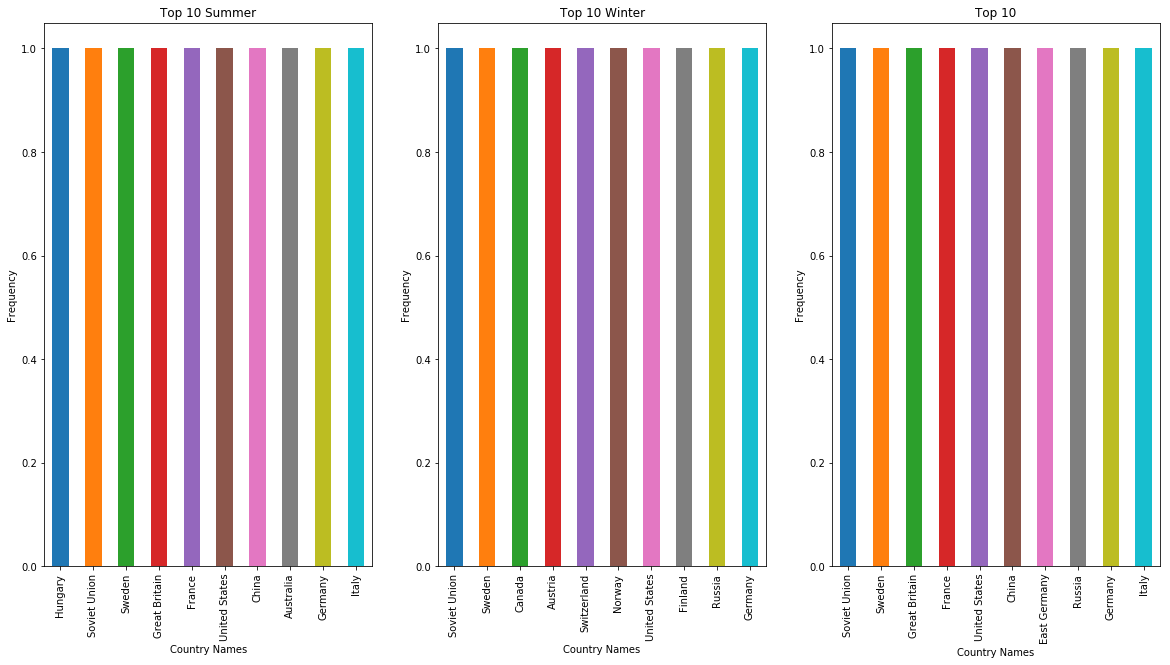

In [47]:
# plotting bar grap

fig,(ax_1,ax_2,ax_3) = plt.subplots(1,3,figsize = (20,10))

summer_df['Country_Name'].value_counts().plot(kind="bar",ax = ax_1)
ax_1.set_xlabel("Country Names")
ax_1.set_ylabel("Frequency")
ax_1.set_title("Top 10 Summer")

winter_df['Country_Name'].value_counts().plot(kind="bar",ax = ax_2)
ax_2.set_xlabel("Country Names")
ax_2.set_ylabel("Frequency")
ax_2.set_title("Top 10 Winter")

top_df['Country_Name'].value_counts().plot(kind="bar",ax = ax_3)
ax_3.set_xlabel("Country Names")
ax_3.set_ylabel("Frequency")
ax_3.set_title("Top 10")

plt.show()

## Top performing country(Gold) 

Winning silver or bronze medals is a big achievement but winning gold is bigger. 
Using the above created dataframe subsets, in this task let's find out which country has had the best performance with respect to the ratio between gold medals won and total medals won.

In [56]:

summer_df['Golden_Ratio'] = summer_df['Gold_Summer'] / summer_df['Total_Summer']



summer_max_ratio = max(summer_df['Golden_Ratio'].value_counts().keys())


summer_country_gold = list(summer_df[summer_df['Golden_Ratio'] == summer_max_ratio]['Country_Name'])[0]


China


C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
winter_df['Golden_Ratio'] = winter_df['Gold_Winter'] / winter_df['Total_Winter']

winter_max_ratio = max(winter_df['Golden_Ratio'].value_counts().keys())


winter_country_gold = list(winter_df[winter_df['Golden_Ratio'] == winter_max_ratio]['Country_Name'])[0]

C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
top_df['Golden_Ratio'] = top_df['Gold_Total'] / top_df['Total_Medals']

top_max_ratio = max(top_df['Golden_Ratio'].value_counts().keys())


top_country_gold = list(top_df[top_df['Golden_Ratio'] == top_max_ratio]['Country_Name'])[0]



C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Best in the world

Winning Gold is great but is winning most gold equivalent to being the best overall perfomer? Let's find out.

In [75]:
data_1 = data.iloc[:-1,:-2]

data_1['Total_Points'] = data_1['Gold_Total'] * 3 + data_1['Silver_Total'] * 2 + data_1['Bronze_Total']

# fnding the maximum value
most_points = data_1['Total_Points'].max()

# finding the country associated with most points
best_country = list(data_1[data_1['Total_Points'] == most_points ]['Country_Name'])[0]


'United States'

## Plot for the best

We know which country is best when it comes to winning the most points in Olympic Games. Let's plot the medal count to visualise their success better.

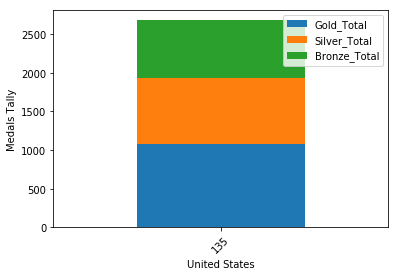

In [82]:
best = data[data['Country_Name'] == best_country]

best = best[['Gold_Total','Silver_Total','Bronze_Total']]

best.plot(kind="bar",stacked = True)
plt.xlabel("United States")
plt.ylabel("Medals Tally")
plt.xticks(rotation = 45)
plt.show()